# Data Visualization with Python


## Loading Data

In [39]:
%pip install seaborn
%pip install wquantiles
%pip install plotly matplotlib scipy



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wquantiles
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust

df = pd.read_csv('coursea_data 2.csv')
df.head(5)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Data Cleaning

In [41]:
df.head(5)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [42]:
df.shape

(891, 7)

There are 891 observations and 7 features in dataset.


### Handling Missing Values


In [43]:
df.isnull().any().any()

np.False_

No missing values

### Removing duplicate samples and features.


In [44]:
df.duplicated().sum()

np.int64(0)

No duplicated values

In [45]:
data = df.drop(columns=['Unnamed: 0'])
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Remove unnecessary column 'Unnamed: 0'

In [46]:
def convert_to_int(x):
    if x[-1] == 'k':
        return (float(x.replace('k', '')) * 1000)
    elif x[-1] == 'm':
        return (float(x.replace('m', '')) * 1000000)
    else:
        return float(x)

data['course_students_enrolled'] = data['course_students_enrolled'].apply(convert_to_int)
data.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


"course_students_enrolled" column is converted from string to numeric. 

## Exploratory Data Analysis


### Estimating Location and Variability of the Data

In [32]:
print("Median:" , data['course_rating'].median())
print("Weighted Median:" , wquantiles.median(data['course_rating'], weights=data['course_rating'])) #The fact that the media did not change despite the weighting shows that the ratings of popular courses are also concentrated around 4.7.
print("Trimmed Mean:" , stats.trim_mean(data['course_rating'], 0.1)) #When the 10% values at the extremes of the data set are removed, the calculated mean is 4.6937. It is observed that the extreme values (very low or very high ratings) have a minimal effect on the data set.
print("Mean:" , data['course_rating'].mean())   # The arithmetic mean of all ratings is 4.6773.
print("Weighted Mean:" , np.average(data['course_rating'], weights= (data['course_rating']))) # As the ratings of popular courses are generally high, the weighted average is slightly higher than the overall average.

# Estimating the Variability/Dispersion of your Data
print("Standart Deviation:" , data['course_rating'].std()) # Ratings deviate from the mean by an average of 0.1622 units.A low standard deviation indicates that the ratings are fairly close to each other, i.e. courses generally receive high ratings.
print("Variance:" , data['course_rating'].var())  #  This small variance value confirms that ratings generally have similar values.
print("Mean Absolute Deviation:" , robust.scale.mad(data['course_rating'])) # This value shows that ratings are generally concentrated around 4.677.
print("Percentiles:" , data['course_rating'].quantile(0.75) - data['course_rating'].quantile(0.25))  #Although there are low ratings in the dataset, the vast majority are concentrated at high values.
print("Mean Absolute Deviation:" , stats.median_abs_deviation(data['course_rating'], center=np.mean)) # ıt tells that the majority of ratings are even closer to the median.


Median: 4.7
Weighted Median: 4.7
Trimmed Mean: 4.693688639551192
Mean: 4.677328843995511
Weighted Mean: 4.6829490101979605
Standart Deviation: 0.16222484967625145
Variance: 0.026316901852482383
Mean Absolute Deviation: 0.14826022185055968
Percentiles: 0.20000000000000018
Mean Absolute Deviation: 0.12267115600448886


* The median and weighted median are the same, indicating that popular courses also received similar scores, with scores generally concentrated around 4.7.The trimmed mean indicates that outliers (very low or very high scores) do not affect the mean much, meaning that the dataset is largely free of outliers. A weighted average slightly higher than the overall average implies that popular courses generally score higher. 

* Low values of standard deviation and variance indicate that the course scores are tightly clustered around the mean and that the scores are close to each other. Low values of mean absolute deviation and median absolute deviation indicate that scores are concentrated around the median and there are no large deviations in the data set. A low difference between percentiles (0.2000) indicates that the majority of scores are close to high values and that low scores are in the minority in the data set.

* These statistics show that courses generally score high and close to each other, that popular courses are similarly highly rated, and that outliers (very low or very high scores) are limited in the dataset. This may suggest that the quality of courses is generally perceived as high and student satisfaction is stable.

## Performing Exploratory Data Analysis

#### Visualization 1: Ratings by Difficulty Level

<Figure size 1000x600 with 0 Axes>

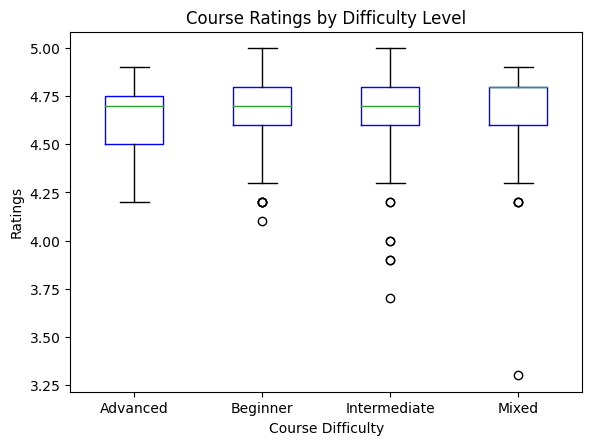

In [34]:
plt.figure(figsize=(10, 6))
data.boxplot(column='course_rating', by='course_difficulty', grid=False, color=dict(boxes="blue", whiskers="black"))
plt.title('Course Ratings by Difficulty Level')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Course Difficulty')
plt.ylabel('Ratings')
plt.show()


* The ratings of ‘Beginner’ courses are generally higher. Intermediate courses have a higher outlier rate. Courses at the ‘Mixed’ difficulty level have both the highest and lowest ratings.Courses of all difficulty levels are rated successful with a rating above 4.5.

#### Visualization 2: Distribution of Course Ratings


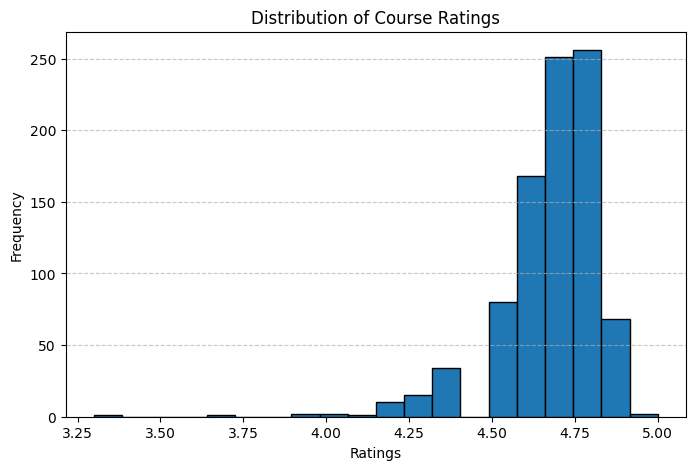

In [35]:
plt.figure(figsize=(8, 5))
data['course_rating'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Course Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Courses on Coursera are generally of high quality and well received by students.


#### Visualization 3: Top 10 Courses by Enrollment

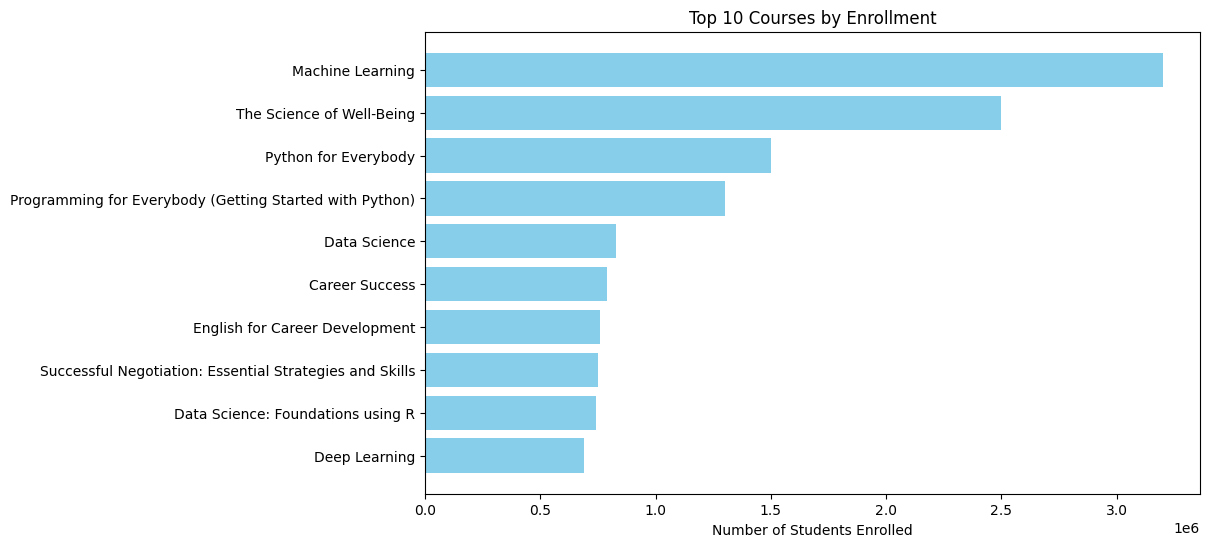

In [36]:
top_courses = data.nlargest(10, 'course_students_enrolled')
plt.figure(figsize=(10, 6))
plt.barh(top_courses['course_title'], top_courses['course_students_enrolled'], color='skyblue')
plt.xlabel('Number of Students Enrolled')
plt.title('Top 10 Courses by Enrollment')
plt.gca().invert_yaxis()
plt.show()

* Technology and data science are popular and in-demand areas for students.


#### Visualization 4: Top 10 Course Organizations by Course Offerings

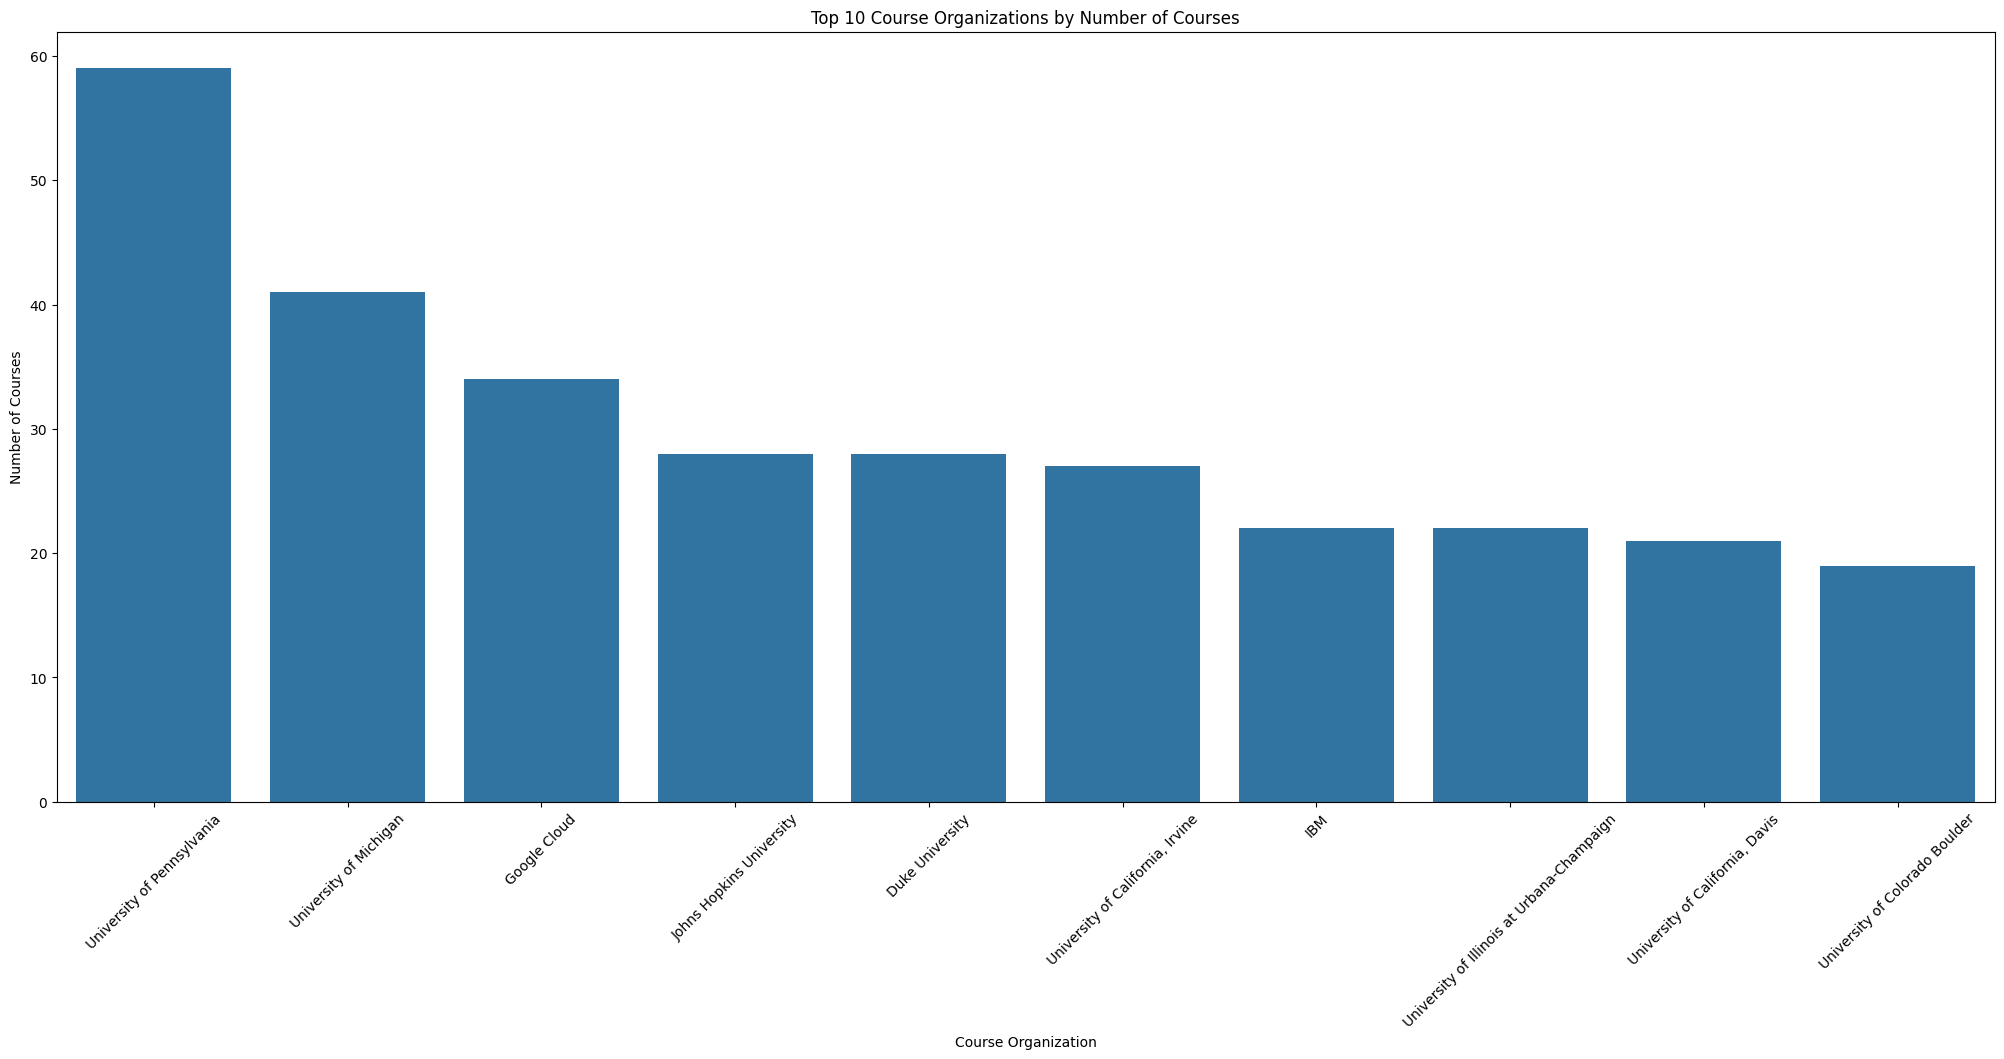

In [47]:
top_organizations = data['course_organization'].value_counts().head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x=top_organizations.index, y=top_organizations.values)
plt.title('Top 10 Course Organizations by Number of Courses')
plt.xlabel('Course Organization')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

#### Visualization 5: Course Difficulty Levels

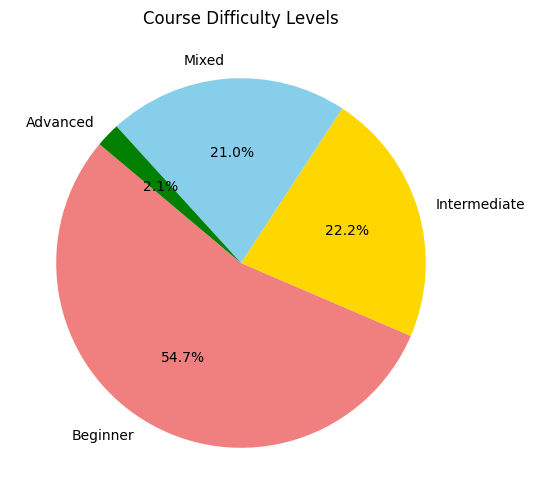

In [49]:
difficulty_counts = data['course_difficulty'].value_counts()
plt.figure(figsize=(6, 6))
difficulty_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'skyblue','green'])
plt.title('Course Difficulty Levels')
plt.ylabel('')
plt.show()

* The vast majority of courses are beginner level. Coursera offers a mix of course content to appeal to a wide range of learners. mixed and intermediate level courses are evenly distributed and make up half of all courses. Advanced level courses were chosen by a very low number of students, 2 per cent.


#### Visualization 6: Courses Counts of Coursera Ratings

<Axes: xlabel='course_rating', ylabel='count'>

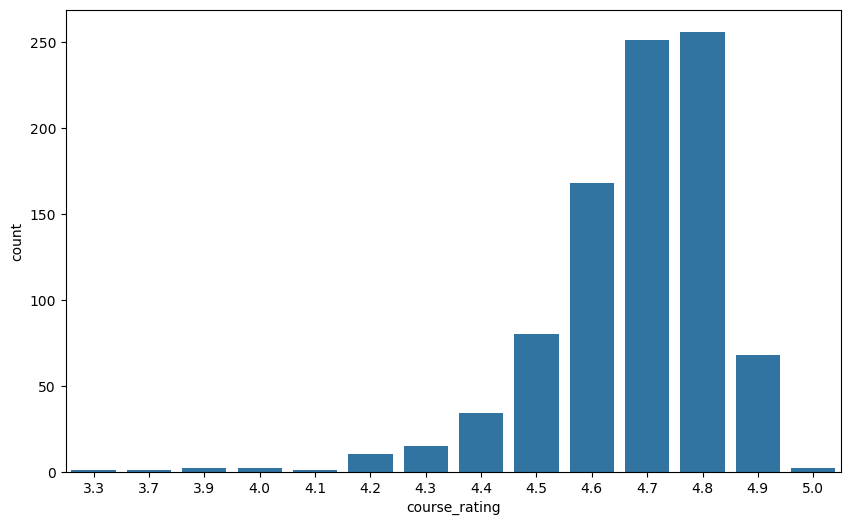

In [50]:
fig_dims = (10,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='course_rating',data = data,ax=ax)

* It is observed that as the course evaluation score increases, the number of students generally increases. It is understood that courses with a score of 4.5 and above tend to attract more students.


#### Visualization 7: Correlation between enrolled students amounts and course ratings

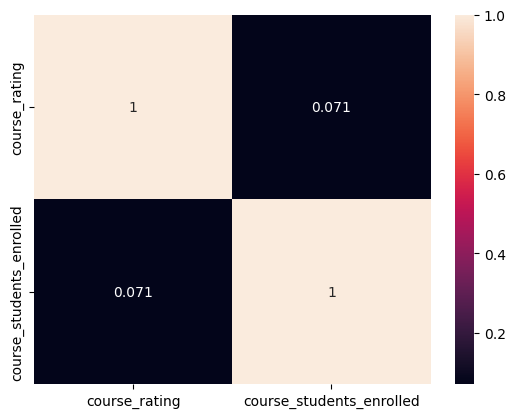

In [51]:
sns.heatmap(data[['course_rating','course_students_enrolled']].corr(),annot=True)
plt.show()

* The correlation coefficient is very low, i.e. there is no strong relationship between the number of registrations and the rating.


#### Course Difficulties and Enrolled Student Amounts

In [52]:
print(data.groupby(['course_difficulty'])['course_students_enrolled'].sum())


course_difficulty
Advanced         1264400.0
Beginner        39921800.0
Intermediate    14506300.0
Mixed           24989400.0
Name: course_students_enrolled, dtype: float64


### Suggestions

1. Benchmarking: We can compare the platform's performance (ratings and enrollments) against competitors or industry averages to contextualize the findings

2. Handling Outliers: We can conduct a deeper investigation into outlier courses (e.g., very low-rated courses) to identify potential issues like content quality or lack of engagement.

3. Incorporate Additional Variables: We can analyze other available variables such as certificate type, course organization, and category, which may reveal hidden trends or relationships.Also we can examine the relationship between course difficulty and other metrics like ratings and enrollments for multi-dimensional insights.